In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()



In [2]:
url= "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [3]:
df=pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [5]:
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
from sklearn.preprocessing import StandardScaler
features=['sepal length','sepal width','petal length','petal width']
#seperating out the features
x=df.loc[:,features].values

#seperatinf out the target
y=df.loc[:,['target']].values

#standardizing the features
x=StandardScaler().fit_transform(x)

# Applying PCA

In [7]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
principalComponents=pca.fit_transform(x)
principalDF=pd.DataFrame(data=principalComponents,
                        columns=['principal component 1','principal component 2'])
finalDf=pd.concat([principalDF,df[['target']]],axis=1)

finalDf

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
...,...,...,...
145,1.870522,0.382822,Iris-virginica
146,1.558492,-0.905314,Iris-virginica
147,1.520845,0.266795,Iris-virginica
148,1.376391,1.016362,Iris-virginica


# Visualize Data

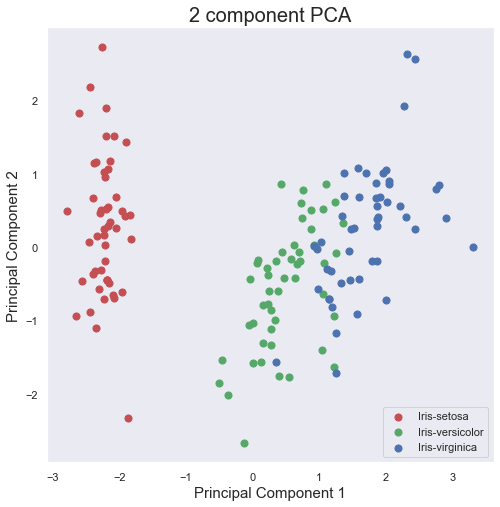

In [8]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 component PCA', fontsize=20)
targets=['Iris-setosa','Iris-versicolor','Iris-virginica']
colors=['r','g','b']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep,'principal component 1'],
               finalDf.loc[indicesToKeep,'principal component 2']
              ,c=color
              ,s=50)
    
ax.legend(targets)
ax.grid()

In [9]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
from sklearn.metrics import accuracy_score
from sklearn import neighbors

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.4, random_state=50)

In [13]:
knn = neighbors.KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)



<ipython-input-13-f18db436f800>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_train,y_train)


In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[21,  0,  0],
       [ 0, 20,  1],
       [ 0,  1, 17]], dtype=int64)

In [15]:
print(accuracy_score(y_test,y_pred))

0.9666666666666667


In [24]:
knn.predict([[5.0,3.6,1.4,0.2]])

array(['Iris-virginica'], dtype=object)